<a href="https://colab.research.google.com/github/SamuelK87/Machine-vision-based-defect-detection-in-welding-process/blob/master/classifier_on_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import the necessary packages

In [139]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

# load the image

In [140]:
image_path='/content/drive/My Drive/Colab Notebooks/weld_dataset_10cls/cap undercut/0000089.jpg'
image = cv2.imread(image_path)
output = image.copy()

# pre-process the image for classification

In [141]:
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# load the trained convolutional neural network and the label
# binarizer

In [142]:
print("[INFO] loading network...")
model = load_model('/content/drive/My Drive/Colab Notebooks/Results/wdef_10cls_400ep/Wld_10cls.model')
lb = pickle.loads(open('/content/drive/My Drive/Colab Notebooks/Results/wdef_10cls_400ep/lb.pickle', "rb").read())

[INFO] loading network...


# classify the input image

In [143]:
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]

[INFO] classifying image...


# we'll mark our prediction as "correct" of the input image filename contains the predicted label text (obviously this makes the assumption that you have named your testing image files this way)

In [144]:
filename = image_path[image_path.rfind(os.path.sep) + 1:]

#correct = "correct" if filename.rfind(label) != -1 else "incorrect"

# build the label and draw the label on the image

In [145]:
label = "{}: {:.2f}% ".format(label, proba[idx] * 100)
output = imutils.resize(output, width=400)
cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

array([[[ 42,  42,  42],
        [ 42,  42,  42],
        [ 42,  42,  42],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 42,  42,  42],
        [ 42,  42,  42],
        [ 42,  42,  42],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       [[ 42,  42,  42],
        [ 42,  42,  42],
        [ 42,  42,  42],
        ...,
        [108, 108, 108],
        [108, 108, 108],
        [108, 108, 108]],

       ...,

       [[145, 145, 145],
        [145, 145, 145],
        [145, 145, 145],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       [[145, 145, 145],
        [145, 145, 145],
        [145, 145, 145],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]],

       [[145, 145, 145],
        [145, 145, 145],
        [145, 145, 145],
        ...,
        [110, 110, 110],
        [110, 110, 110],
        [110, 110, 110]]

# show the output image

[INFO] cap undercut: 93.51% 


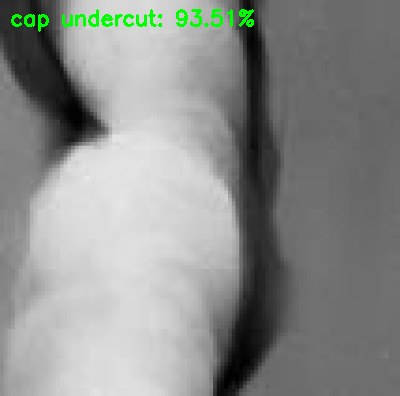

-1

In [146]:
print("[INFO] {}".format(label))
cv2_imshow( output)
cv2.waitKey(0)